#Installation Stuffs

In [ ]:
pwd

'/content'

In [ ]:
# timestamp
from datetime import datetime
now = datetime.now() # current date and time
date_time = now.strftime("%m-%d-%Y-%H-%M-%S")

In [ ]:
print(date_time)

05-16-2023-13-22-44


##GPU Init

In [ ]:
# %tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
!git clone https://github.com/ezaaputra/indonlu.git

Cloning into 'indonlu'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 460 (delta 119), reused 108 (delta 108), pack-reused 312
Receiving objects: 100% (460/460), 4.83 MiB | 19.18 MiB/s, done.
Resolving deltas: 100% (229/229), done.


In [ ]:
!pip -q install numpy --upgrade
!pip -q install pandas --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 93.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [ ]:
!pip install -q emoji
!pip install -q xformers
!pip install -q transformers
!pip install -q torch
!pip install -q cuda
!pip install -U -q PyDrive
!pip -q install Sastrawi
!pip -q install xlsxwriter
!pip -q install PySastrawi
!pip -q install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement cuda (from versions: none)
ERROR: No matching distribution found for cuda
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

##Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # mount supaya bisa akses file di Drive

Mounted at /content/drive


#Imports

In [ ]:
# Generals
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 500)

import numpy as np
import re
import random
import torch
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, recall_score, precision_score
from collections import defaultdict
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings # to modify warnings
warnings.filterwarnings('ignore') # ignoring warnings
sns.set_style('darkgrid')

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
# IndoBERT Model
import random
import torch
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm

from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
from indonlu.utils.forward_fn import forward_sequence_classification
from indonlu.utils.metrics import document_sentiment_metrics_fn

In [ ]:
# NLP
import emoji
import nltk
import re, string, unicodedata
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_new = pd.read_csv("cleaned-all-final.CSV")

In [ ]:
df_new.head(5)

,cleaned_text,sentiment_status
0,jerit sopir angkutan kota kota bandung beli pe...,negative
1,dear kayaknya pengaturan maps tujuan dibenarka...,negative
2,bus selesai oi odan the way sedadang jaladan h...,negative
3,eta transportasi masal keluarga garut bandung ...,negative
4,pagi nya keliling apartemen mencerahkn pagiku ...,negative


#Processing

##Split Dataset

In [ ]:
# train test val split
train_set, val_set = train_test_split(df_new, test_size=0.3, stratify=df_new.sentiment_status, random_state=1)
val_set, test_set = train_test_split(val_set, test_size=0.33, stratify=val_set.sentiment_status, random_state=1)

print(f'Train shape: {train_set.shape}')
print(f'Val shape: {val_set.shape}')
print(f'Test shape: {test_set.shape}')

# export to tsv
train_set.to_csv('train_set.tsv', sep='\t', header=None, index=False)
val_set.to_csv('val_set.tsv', sep='\t', header=None, index=False)
test_set.to_csv('test_set.tsv', sep='\t', header=None, index=False)

Train shape: (12978, 2)
Val shape: (3727, 2)
Test shape: (1836, 2)


##BERT

###BERT - Common Functions

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

# Set random seed
set_seed(27)

###BERT - Configs

In [ ]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = DocumentSentimentDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

# Struktur model
print(model)

# Jumlah parameter
print(count_param(model))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

###BERT - Data Preps

###CONFIG TRAIN

In [ ]:
# configs
n_epochs = 10
batchSize = 32
lrNum = 3e-6

In [ ]:
train_dataset_path = '/content/train_set.tsv'
valid_dataset_path = '/content/val_set.tsv'
test_dataset_path = '/content/test_set.tsv'

# fungsi dataset loader dari utils IndoNLU
train_dataset = DocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = DocumentSentimentDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = DocumentSentimentDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = DocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=batchSize, num_workers=16, shuffle=True)
valid_loader = DocumentSentimentDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=batchSize, num_workers=16, shuffle=False)
test_loader = DocumentSentimentDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=batchSize, num_workers=16, shuffle=False)

w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print(w2i) #word to index
print(i2w) #index to word

{'positive': 0, 'neutral': 1, 'negative': 2}
{0: 'positive', 1: 'neutral', 2: 'negative'}


###BERT - Training

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=lrNum)
model = model.cuda()

# Train
with tf.device('/device:GPU:0'):
  history = defaultdict(list)
  for epoch in range(n_epochs):
      model.train()
      torch.set_grad_enabled(True)

      total_train_loss = 0
      list_hyp_train, list_label = [], []

      train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
      for i, batch_data in enumerate(train_pbar):
          # Forward model
          loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

          # Update model
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          tr_loss = loss.item()
          total_train_loss = total_train_loss + tr_loss

          # Hitung skor train metrics
          list_hyp_train += batch_hyp
          list_label += batch_label

          train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
              total_train_loss/(i+1), get_lr(optimizer)))

      metrics = document_sentiment_metrics_fn(list_hyp_train, list_label)
      print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
          total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

      # save train acc for learning curve
      history['train_acc'].append(metrics['ACC'])

      # Evaluate di validation set
      model.eval()
      torch.set_grad_enabled(False)

      total_loss, total_correct, total_labels = 0, 0, 0
      list_hyp, list_label = [], []

      pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
      for i, batch_data in enumerate(pbar):
          batch_seq = batch_data[-1]
          loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

          # Hitung total loss
          valid_loss = loss.item()
          total_loss = total_loss + valid_loss

          # Hitung skor evaluation metrics
          list_hyp += batch_hyp
          list_label += batch_label
          metrics = document_sentiment_metrics_fn(list_hyp, list_label)

          pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

      metrics = document_sentiment_metrics_fn(list_hyp, list_label)
      print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
          total_loss/(i+1), metrics_to_string(metrics)))

      # save validation acc for learning curve
      history['val_acc'].append(metrics['ACC'])

(Epoch 1) TRAIN LOSS:0.6310 LR:0.00000300: 100%|██████████| 406/406 [01:58<00:00,  3.42it/s]


(Epoch 1) TRAIN LOSS:0.6310 ACC:0.75 F1:0.43 REC:0.42 PRE:0.57 LR:0.00000300


VALID LOSS:0.5227 ACC:0.79 F1:0.62 REC:0.61 PRE:0.68: 100%|██████████| 117/117 [00:13<00:00,  8.41it/s]


(Epoch 1) VALID LOSS:0.5227 ACC:0.79 F1:0.62 REC:0.61 PRE:0.68


(Epoch 2) TRAIN LOSS:0.4881 LR:0.00000300: 100%|██████████| 406/406 [01:59<00:00,  3.41it/s]


(Epoch 2) TRAIN LOSS:0.4881 ACC:0.81 F1:0.65 REC:0.61 PRE:0.72 LR:0.00000300


VALID LOSS:0.5019 ACC:0.80 F1:0.64 REC:0.61 PRE:0.70: 100%|██████████| 117/117 [00:13<00:00,  8.42it/s]


(Epoch 2) VALID LOSS:0.5019 ACC:0.80 F1:0.64 REC:0.61 PRE:0.70


(Epoch 3) TRAIN LOSS:0.4302 LR:0.00000300: 100%|██████████| 406/406 [01:57<00:00,  3.44it/s]


(Epoch 3) TRAIN LOSS:0.4302 ACC:0.83 F1:0.70 REC:0.66 PRE:0.75 LR:0.00000300


VALID LOSS:0.4884 ACC:0.81 F1:0.66 REC:0.62 PRE:0.72: 100%|██████████| 117/117 [00:13<00:00,  8.40it/s]


(Epoch 3) VALID LOSS:0.4884 ACC:0.81 F1:0.66 REC:0.62 PRE:0.72


(Epoch 4) TRAIN LOSS:0.3803 LR:0.00000300: 100%|██████████| 406/406 [01:57<00:00,  3.46it/s]


(Epoch 4) TRAIN LOSS:0.3803 ACC:0.85 F1:0.75 REC:0.72 PRE:0.79 LR:0.00000300


VALID LOSS:0.5067 ACC:0.79 F1:0.66 REC:0.66 PRE:0.67: 100%|██████████| 117/117 [00:13<00:00,  8.41it/s]


(Epoch 4) VALID LOSS:0.5067 ACC:0.79 F1:0.66 REC:0.66 PRE:0.67


(Epoch 5) TRAIN LOSS:0.3267 LR:0.00000300: 100%|██████████| 406/406 [01:58<00:00,  3.44it/s]


(Epoch 5) TRAIN LOSS:0.3267 ACC:0.87 F1:0.79 REC:0.77 PRE:0.82 LR:0.00000300


VALID LOSS:0.5292 ACC:0.79 F1:0.67 REC:0.66 PRE:0.68: 100%|██████████| 117/117 [00:13<00:00,  8.44it/s]


(Epoch 5) VALID LOSS:0.5292 ACC:0.79 F1:0.67 REC:0.66 PRE:0.68


(Epoch 6) TRAIN LOSS:0.2756 LR:0.00000300: 100%|██████████| 406/406 [01:57<00:00,  3.46it/s]


(Epoch 6) TRAIN LOSS:0.2756 ACC:0.90 F1:0.84 REC:0.82 PRE:0.86 LR:0.00000300


VALID LOSS:0.5766 ACC:0.79 F1:0.66 REC:0.66 PRE:0.67: 100%|██████████| 117/117 [00:13<00:00,  8.41it/s]


(Epoch 6) VALID LOSS:0.5766 ACC:0.79 F1:0.66 REC:0.66 PRE:0.67


(Epoch 7) TRAIN LOSS:0.2245 LR:0.00000300: 100%|██████████| 406/406 [01:57<00:00,  3.46it/s]


(Epoch 7) TRAIN LOSS:0.2245 ACC:0.92 F1:0.87 REC:0.86 PRE:0.89 LR:0.00000300


VALID LOSS:0.6193 ACC:0.78 F1:0.66 REC:0.66 PRE:0.66: 100%|██████████| 117/117 [00:13<00:00,  8.40it/s]


(Epoch 7) VALID LOSS:0.6193 ACC:0.78 F1:0.66 REC:0.66 PRE:0.66


(Epoch 8) TRAIN LOSS:0.1805 LR:0.00000300: 100%|██████████| 406/406 [01:57<00:00,  3.46it/s]


(Epoch 8) TRAIN LOSS:0.1805 ACC:0.94 F1:0.90 REC:0.89 PRE:0.92 LR:0.00000300


VALID LOSS:0.7098 ACC:0.76 F1:0.65 REC:0.67 PRE:0.65: 100%|██████████| 117/117 [00:13<00:00,  8.41it/s]


(Epoch 8) VALID LOSS:0.7098 ACC:0.76 F1:0.65 REC:0.67 PRE:0.65


(Epoch 9) TRAIN LOSS:0.1532 LR:0.00000300: 100%|██████████| 406/406 [01:57<00:00,  3.44it/s]


(Epoch 9) TRAIN LOSS:0.1532 ACC:0.95 F1:0.92 REC:0.91 PRE:0.93 LR:0.00000300


VALID LOSS:0.7387 ACC:0.77 F1:0.65 REC:0.66 PRE:0.64: 100%|██████████| 117/117 [00:13<00:00,  8.42it/s]


(Epoch 9) VALID LOSS:0.7387 ACC:0.77 F1:0.65 REC:0.66 PRE:0.64


(Epoch 10) TRAIN LOSS:0.1316 LR:0.00000300: 100%|██████████| 406/406 [01:57<00:00,  3.45it/s]


(Epoch 10) TRAIN LOSS:0.1316 ACC:0.96 F1:0.93 REC:0.92 PRE:0.94 LR:0.00000300


VALID LOSS:0.7622 ACC:0.79 F1:0.65 REC:0.63 PRE:0.67: 100%|██████████| 117/117 [00:13<00:00,  8.40it/s]

(Epoch 10) VALID LOSS:0.7622 ACC:0.79 F1:0.65 REC:0.63 PRE:0.67


In [ ]:
import torch
modelfilename = str(n_epochs) + "ep-" + date_time + "-batch-" + str(batchSize) + "lr-" + str(lrNum)

# harusnya save_pretrained
# https://discuss.huggingface.co/t/saving-loading-model-in-colab-and-making-predictions/6723
# https://lightrun.com/answers/huggingface-setfit-hfvalidationerror-when-loading-the-model
torch.save(model, '/content/drive/MyDrive/[dataset-thesis/model-' + modelfilename)

In [ ]:
print(modelfilename)

10ep-05-04-2023-12-26-06-batch-32lr-3e-06


In [ ]:
# saved_model = torch.load('/content/drive/MyDrive/[dataset-thesis/model')

###Learning Curve

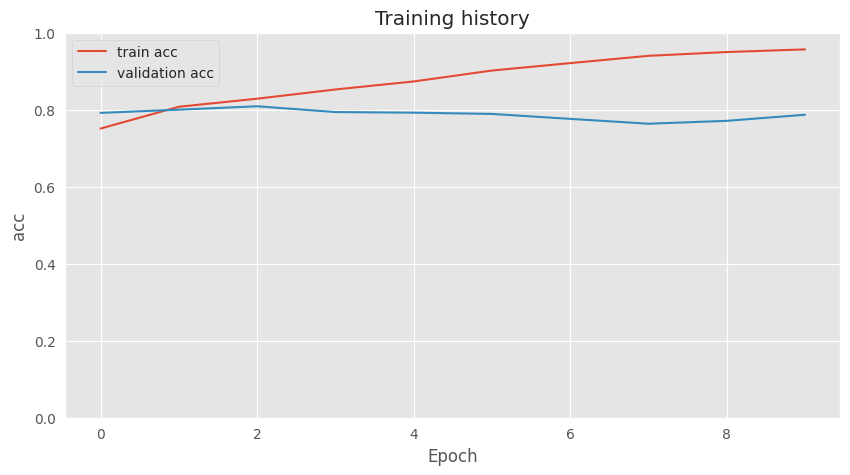

In [ ]:
plt.plot(history['train_acc'], label='train acc')
plt.plot(history['val_acc'], label='validation acc')
plt.title('Training history')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
val_df = pd.read_csv(valid_dataset_path, sep='\t', names=['review_text', 'category'])
val_df['pred'] = list_hyp
val_df.head()
valfile = 'val_result' + str(n_epochs) + "ep-" + date_time + "-batch-" + str(batchSize) + "lr-" + str(lrNum) + '.csv'
val_df.to_csv(valfile, index=False)

###Prediksi Test Set

In [ ]:
# Prediksi test set
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
pred, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    pred += batch_hyp

# metrics = document_sentiment_metrics_fn(list_hyp, list_label)
# print("TEST Metrics | {}".format(metrics_to_string(metrics)))

100%|██████████| 58/58 [00:06<00:00,  8.77it/s]


In [ ]:
# Simpan prediksi test set
test_df = pd.read_csv(test_dataset_path, sep='\t', names=['review_text', 'category'])
test_df['pred'] = pred
test_df.head()
test_df.to_csv('test-result_' + str(n_epochs) + "ep-" + date_time + "-batch-" + str(batchSize) + "lr-" + str(lrNum) + ".csv", index=False)

#Evaluate

In [ ]:
val_real = val_df.category
val_pred = val_df.pred

test_real = test_df.category
test_pred = test_df.pred

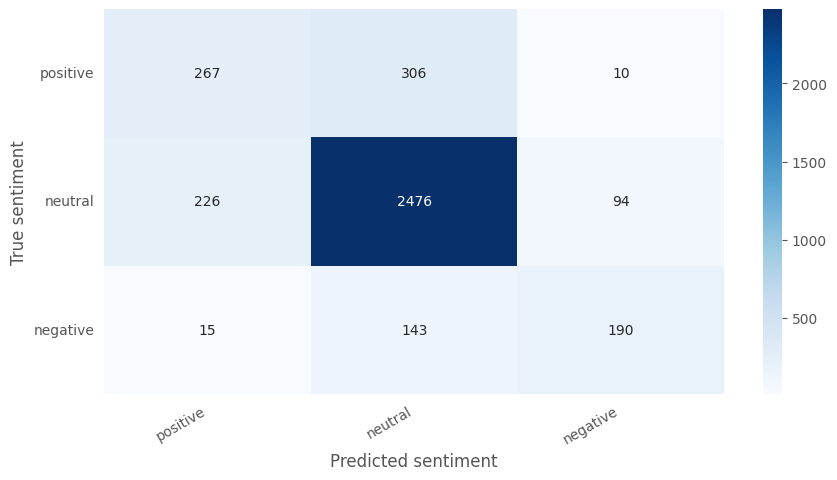

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(val_real, val_pred)
df_cm = pd.DataFrame(cm, index=['positive', 'neutral', 'negative'], columns=['positive', 'neutral', 'negative'])
show_confusion_matrix(df_cm)

In [ ]:
print(classification_report(val_real, val_pred, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.53      0.46      0.49       583
     neutral       0.85      0.89      0.87      2796
    negative       0.65      0.55      0.59       348

    accuracy                           0.79      3727
   macro avg       0.67      0.63      0.65      3727
weighted avg       0.78      0.79      0.78      3727



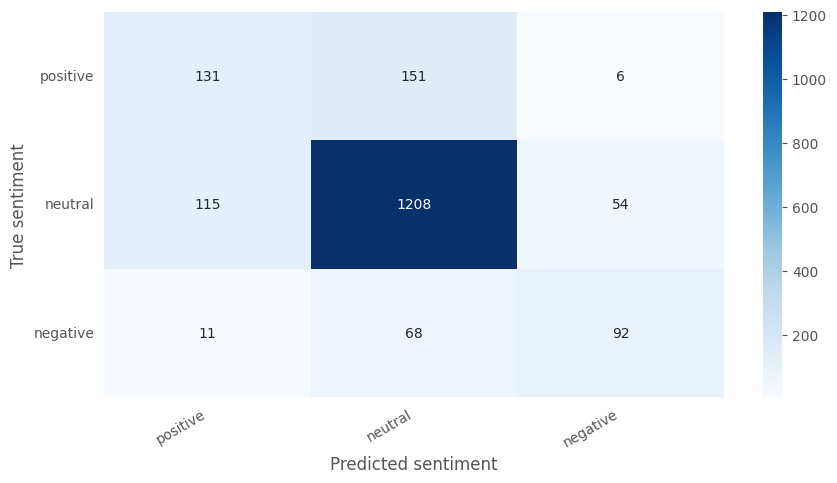

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(test_real, test_pred)
df_cm = pd.DataFrame(cm, index=['positive', 'neutral', 'negative'], columns=['positive', 'neutral', 'negative'])
show_confusion_matrix(df_cm)

In [ ]:
print(classification_report(test_real, test_pred, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.51      0.45      0.48       288
     neutral       0.85      0.88      0.86      1377
    negative       0.61      0.54      0.57       171

    accuracy                           0.78      1836
   macro avg       0.65      0.62      0.64      1836
weighted avg       0.77      0.78      0.77      1836



#SVM

##Linear kernel

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the data into a pandas DataFrame
data = pd.read_csv('cleaned-all-final.CSV')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

with tf.device('/device:GPU:0'):
  # Create a TF-IDF vectorizer to convert the tweet text into numerical features
  vectorizer = TfidfVectorizer()
  X_train = vectorizer.fit_transform(train_data['cleaned_text'])
  y_train = train_data['sentiment_status']
  X_test = vectorizer.transform(test_data['cleaned_text'])
  y_test = test_data['sentiment_status']

  # default function is used,
  # SVC(*, C=1.0, kernel='..........', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False,
  #     tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
  #     break_ties=False, random_state=None)
  # Train an SVM model on the training data
  svm = SVC(kernel='linear')
  svm.fit(X_train, y_train)

In [ ]:
# Predict the labels for the training data
y_train_pred = svm.predict(X_train)

In [ ]:
# Compute accuracy, precision, recall, and F1-score using the training data
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8639428263214671
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.47      0.62      2340
     neutral       0.86      0.99      0.92     11098
    positive       0.89      0.55      0.68      1394

    accuracy                           0.86     14832
   macro avg       0.89      0.67      0.74     14832
weighted avg       0.87      0.86      0.85     14832



In [ ]:
# Predict the sentiment of the test data
y_pred = svm.predict(X_test)

In [ ]:
# Calculate the accuracy and classification report of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification report:\n', report)

Accuracy: 0.8015637638177406
Classification report:
               precision    recall  f1-score   support

    negative       0.64      0.25      0.36       563
     neutral       0.82      0.96      0.88      2809
    positive       0.72      0.36      0.48       337

    accuracy                           0.80      3709
   macro avg       0.72      0.53      0.58      3709
weighted avg       0.78      0.80      0.77      3709



##RBF Kernel

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the data into a pandas DataFrame
data = pd.read_csv('cleaned-all-final.CSV')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

with tf.device('/device:GPU:0'):
  # Create a TF-IDF vectorizer to convert the tweet text into numerical features
  vectorizer = TfidfVectorizer()
  X_train = vectorizer.fit_transform(train_data['cleaned_text'])
  y_train = train_data['sentiment_status']
  X_test = vectorizer.transform(test_data['cleaned_text'])
  y_test = test_data['sentiment_status']

  # Train an SVM model on the training data
  svm = SVC(kernel='rbf')
  svm.fit(X_train, y_train)

In [ ]:
# Predict the labels for the training data
y_train_pred = svm.predict(X_train)

In [ ]:
# Compute accuracy, precision, recall, and F1-score using the training data
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9170037756202805
Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.70      0.82      2340
     neutral       0.90      1.00      0.95     11098
    positive       0.96      0.66      0.78      1394

    accuracy                           0.92     14832
   macro avg       0.95      0.78      0.85     14832
weighted avg       0.92      0.92      0.91     14832



In [ ]:
# Predict the sentiment of the test data
y_pred = svm.predict(X_test)

In [ ]:
# Calculate the accuracy and classification report of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification report:\n', report)

Accuracy: 0.7883526557023457
Classification report:
               precision    recall  f1-score   support

    negative       0.64      0.13      0.21       563
     neutral       0.79      0.98      0.88      2809
    positive       0.80      0.29      0.42       337

    accuracy                           0.79      3709
   macro avg       0.74      0.47      0.50      3709
weighted avg       0.77      0.79      0.73      3709



#Naive-Bayes

##Naive Bayes with Train ACC

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

# Load data into a pandas dataframe
df = pd.read_csv('cleaned-all-final.CSV')

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Extract features using CountVectorizer
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data['cleaned_text'])
test_features = vectorizer.transform(test_data['cleaned_text'])

# Dictionary to store classification reports
reports = {}

# Train and test Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(train_features.toarray(), train_data['sentiment_status'])
gnb_train_predicted_labels = gnb.predict(train_features.toarray())
gnb_train_accuracy = accuracy_score(train_data['sentiment_status'], gnb_train_predicted_labels)
gnb_train_report = classification_report(train_data['sentiment_status'], gnb_train_predicted_labels)
gnb_test_predicted_labels = gnb.predict(test_features.toarray())
gnb_test_accuracy = accuracy_score(test_data['sentiment_status'], gnb_test_predicted_labels)
gnb_test_report = classification_report(test_data['sentiment_status'], gnb_test_predicted_labels)
reports['Gaussian NB'] = {
    'train_accuracy': gnb_train_accuracy,
    'train_classification_report': gnb_train_report,
    'test_accuracy': gnb_test_accuracy,
    'test_classification_report': gnb_test_report
}

# Train and test Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(train_features, train_data['sentiment_status'])
mnb_train_predicted_labels = mnb.predict(train_features)
mnb_train_accuracy = accuracy_score(train_data['sentiment_status'], mnb_train_predicted_labels)
mnb_train_report = classification_report(train_data['sentiment_status'], mnb_train_predicted_labels)
mnb_test_predicted_labels = mnb.predict(test_features)
mnb_test_accuracy = accuracy_score(test_data['sentiment_status'], mnb_test_predicted_labels)
mnb_test_report = classification_report(test_data['sentiment_status'], mnb_test_predicted_labels)
reports['Multinomial NB'] = {
    'train_accuracy': mnb_train_accuracy,
    'train_classification_report': mnb_train_report,
    'test_accuracy': mnb_test_accuracy,
    'test_classification_report': mnb_test_report
}

# Train and test Bernoulli Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(train_features, train_data['sentiment_status'])
bnb_train_predicted_labels = bnb.predict(train_features)
bnb_train_accuracy = accuracy_score(train_data['sentiment_status'], bnb_train_predicted_labels)
bnb_train_report = classification_report(train_data['sentiment_status'], bnb_train_predicted_labels)
bnb_test_predicted_labels = bnb.predict(test_features)
bnb_test_accuracy = accuracy_score(test_data['sentiment_status'], bnb_test_predicted_labels)
bnb_test_report = classification_report(test_data['sentiment_status'], bnb_test_predicted_labels)
reports['Bernoulli NB'] = {
    'train_accuracy': bnb_train_accuracy,
    'train_classification_report': bnb_train_report,
    'test_accuracy': bnb_test_accuracy,
    'test_classification_report': bnb_test_report
}

# Train and test Complement Naive Bayes classifier
cnb = ComplementNB()
cnb.fit(train_features, train_data['sentiment_status'])
cnb_train_predicted_labels = cnb.predict(train_features)
cnb_train_accuracy = accuracy_score(train_data['sentiment_status'], cnb_train_predicted_labels)
cnb_train_report = classification_report(train_data['sentiment_status'], cnb_train_predicted_labels)
cnb_test_predicted_labels = cnb.predict(test_features)
cnb_test_accuracy = accuracy_score(test_data['sentiment_status'], cnb_test_predicted_labels)
cnb_test_report = classification_report(test_data['sentiment_status'], cnb_test_predicted_labels)
reports['Complement NB'] = {
    'train_accuracy': cnb_train_accuracy,
    'train_classification_report': cnb_train_report,
    'test_accuracy': cnb_test_accuracy,
    'test_classification_report': cnb_test_report
}

# Print classification reports
for algorithm, report in reports.items():
    print(f'{algorithm} Training Accuracy:', report['train_accuracy'])
    print(f'{algorithm} Training Classification Report:\n', report['train_classification_report'])
    print(f'{algorithm} Test Accuracy:', report['test_accuracy'])
    print(f'{algorithm} Test Classification Report:\n', report['test_classification_report'])

Gaussian NB Training Accuracy: 0.7531014023732471
Gaussian NB Training Classification Report:
               precision    recall  f1-score   support

    negative       0.44      1.00      0.61      2903
     neutral       1.00      0.69      0.82     11929

    accuracy                           0.75     14832
   macro avg       0.72      0.85      0.72     14832
weighted avg       0.89      0.75      0.78     14832

Gaussian NB Test Accuracy: 0.2520895119978431
Gaussian NB Test Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.54      0.47      0.50      1978
    positive       0.00      0.00      0.00      1731

    accuracy                           0.25      3709
   macro avg       0.18      0.16      0.17      3709
weighted avg       0.29      0.25      0.27      3709

Multinomial NB Training Accuracy: 0.906957928802589
Multinomial NB Training Classification Report:
           

#Decision Tree

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data into a pandas DataFrame
df = pd.read_csv('cleaned-all-final.CSV')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment_status'], random_state=42)

# Convert the tweet text into a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a decision tree classifier on the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the labels for the training and testing data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Print the classification report for the training data
report_train = classification_report(y_train, y_pred_train)
print("Classification Report (Train Data):\n", report_train)

# Print the classification report for the testing data
report_test = classification_report(y_test, y_pred_test)
print("Classification Report (Test Data):\n", report_test)

Classification Report (Train Data):
               precision    recall  f1-score   support

    negative       0.97      1.00      0.99      2194
     neutral       1.00      0.99      0.99     10415
    positive       1.00      0.97      0.98      1296

    accuracy                           0.99     13905
   macro avg       0.99      0.99      0.99     13905
weighted avg       0.99      0.99      0.99     13905

Classification Report (Test Data):
               precision    recall  f1-score   support

    negative       0.36      0.33      0.35       709
     neutral       0.82      0.84      0.83      3492
    positive       0.48      0.45      0.46       435

    accuracy                           0.73      4636
   macro avg       0.55      0.54      0.55      4636
weighted avg       0.72      0.73      0.72      4636



#TF-IDF/Knn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the data
df = pd.read_csv('cleaned-all-final.CSV')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment_status'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the training and testing data using the TF-IDF vectorizer
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the kNN classifier on the training data
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train_tfidf, y_train)

# Test the kNN classifier on the training data
y_train_pred = clf.predict(X_train_tfidf)

# Generate a classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Test the kNN classifier on the testing data
y_test_pred = clf.predict(X_test_tfidf)

# Generate a classification report for testing data
print("Classification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))

Classification Report - Training Data:
              precision    recall  f1-score   support

    negative       0.86      0.12      0.22      2340
     neutral       0.78      0.99      0.87     11098
    positive       0.83      0.25      0.38      1394

    accuracy                           0.79     14832
   macro avg       0.82      0.45      0.49     14832
weighted avg       0.80      0.79      0.72     14832

Classification Report - Testing Data:
              precision    recall  f1-score   support

    negative       0.61      0.09      0.15       563
     neutral       0.78      0.98      0.87      2809
    positive       0.65      0.17      0.27       337

    accuracy                           0.77      3709
   macro avg       0.68      0.41      0.43      3709
weighted avg       0.74      0.77      0.71      3709



#Using Pre-trained Model Directly

https://huggingface.co/mdhugol/indonesia-bert-sentiment-classification

##Examples

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

pos_text = "Sangat bahagia hari ini"
neg_text = "Dasar anak sialan!! Kurang ajar!!"

result = sentiment_analysis(pos_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

result = sentiment_analysis(neg_text)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Text: {neg_text} | Label : {status} ({score * 100:.3f}%)')

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Text: Sangat bahagia hari ini | Label : positive (99.481%)
Text: Dasar anak sialan!! Kurang ajar!! | Label : negative (99.828%)


##Data sendiri ygy

In [ ]:
pretrained = "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Load your data from CSV
data = pd.read_csv('cleaned-all-final.CSV')

# Create empty columns for sentiment result and percentage
data['sentiment_result'] = ''
data['percentage'] = ''

# Iterate over each row and perform sentiment analysis
for index, row in data.iterrows():
    text = row['cleaned_text']
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']]
    score = result[0]['score']
    percentage = score * 100
    data.at[index, 'sentiment_result'] = status
    data.at[index, 'percentage'] = percentage

# Print the modified data with the expected columns
print(data[['cleaned_text', 'sentiment_status', 'sentiment_result', 'percentage']])

                                            cleaned_text sentiment_status sentiment_result percentage
0      jerit sopir angkutan kota kota bandung beli pe...         negative         negative  97.098225
1      dear kayaknya pengaturan maps tujuan dibenarka...         negative          neutral   99.55948
2      bus selesai oi odan the way sedadang jaladan h...         negative          neutral   56.41436
3      eta transportasi masal keluarga garut bandung ...         negative         negative  99.215525
4      pagi nya keliling apartemen mencerahkn pagiku ...         negative         positive  79.898059
...                                                  ...              ...              ...        ...
18536  ide iyang keren terobosan bernama integrasi an...         positive         positive  57.225907
18537  ammargil dear jokowi kemacetan jakarta nalar k...         positive          neutral  95.966345
18538  msupasitina good mewning mewlions are ready fo...         positive         

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example dataframe
data = pd.read_csv('hasil-pretrained-tanpa-fine-tuning.csv')

# Extract labels and predicted values from the dataframe
labels = data['LABEL'].tolist()
predicted = data['PREDICTED'].tolist()

# Calculate accuracy
accuracy = accuracy_score(labels, predicted)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(labels, predicted, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(labels, predicted, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(labels, predicted, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.6165794725203603
Precision: 0.7388651216006364
Recall: 0.6165794725203603
F1 Score: 0.6500145547437908


#Testing Models

In [ ]:
import os.path
from os import path

path.exists("/content/drive/MyDrive/[dataset-thesis/used-model/model-20ep-05-03-2023-01-17-23-batch-16lr-3e-05")

True

In [ ]:
saved_model = torch.load('./content/drive/MyDrive/[dataset-thesis/used-model/model-20ep-05-03-2023-01-17-23-batch-16lr-3e-05')

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the fine-tuned IndoBERT model

model = AutoModelForSequenceClassification.from_pretrained('dionisiuspr/IndoBERT-SA-thesis')
tokenizer = AutoTokenizer.from_pretrained('dionisiuspr/IndoBERT-SA-thesis')

# Define the device to run the model on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load and preprocess the new data from CSV
data_path = "test-data.csv"
df = pd.read_csv(data_path)

# Extract the "text" column from the dataframe
texts = df["text"].tolist()

# Preprocess text and tokenize the input data
encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
input_ids = encoded_input["input_ids"].to(device)
attention_mask = encoded_input["attention_mask"].to(device)

# Perform inference and get predictions
with torch.no_grad():
    model.eval()
    logits = model(input_ids, attention_mask=attention_mask)[0]
    probabilities = torch.softmax(logits, dim=1)
    predicted_labels = torch.argmax(probabilities, dim=1).tolist()

# Map predicted labels to sentiment categories
label_map = {0: "negative", 1: "neutral", 2: "positive"}
predicted_sentiments = [label_map[label] for label in predicted_labels]

# Add predicted sentiments to the dataframe
df["predicted_sentiment"] = predicted_sentiments

# Save the dataframe with predicted sentiments to a new CSV
output_path = "/content/drive/MyDrive/[dataset-thesis/used-model/results.csv"
df.to_csv(output_path, index=False)

OSError: ignored